In [ ]:
import pandas as pd
df=pd.read_csv(r"C:\Users\admin\Desktop\revathi\DS\ML_project_lab3\creditcard.csv")
print(df)

In [ ]:
df=df.loc[0:200000,:]
df
X=df.drop(columns=['Class'],axis=1)
y=df['Class']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [4]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [5]:
a1 = rfc.score(X_train,y_train)
b1 = rfc.score(X_test,y_test)
y_pred = rfc.predict(X_test)
print(y_pred)
print("Training set accuracy:",a1)
print("Test set accuracy:",b1)

[0. 0. 0. ... 0. 0. 0.]
Training set accuracy: 1.0
Test set accuracy: 0.9995000083331944


In [6]:
! pip install xgboost

In [7]:
import xgboost as xgb
xg = xgb.XGBClassifier()
xg.fit(X_train,y_train)
a7 = xg.score(X_train,y_train)
b7 = xg.score(X_test,y_test)
y_pred7 = xg.predict(X_test)
print(y_pred7)
print("Training set accuracy:",a7)
print("Test set accuracy:",b7)

[0 0 0 ... 0 0 0]
Training set accuracy: 1.0
Test set accuracy: 0.9994833419443009


In [10]:
#knn
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [11]:
score=neigh.score(X_test,y_test)
print(score)
neigh.predict(X_test)

0.9982500291661806


array([0., 0., 0., ..., 0., 0., 0.])

In [14]:
X_train1=X_train.head(50000)
y_train1=y_train.head(50000)
X_test1=X_test.head(50000)
y_test1=y_test.head(50000)

In [15]:
d2=[]
for m in range(1,12):

    neigh2 = KNeighborsClassifier(n_neighbors=m)
    neigh2.fit(X_train1, y_train1)
    score2=neigh2.score(X_test1,y_test1)
    print("accuracy with k=",m, "is",score2)
    d2.append(score2)

accuracy with k= 1 is 0.9977
accuracy with k= 2 is 0.9982
accuracy with k= 3 is 0.9982
accuracy with k= 4 is 0.99816
accuracy with k= 5 is 0.99818
accuracy with k= 6 is 0.99816
accuracy with k= 7 is 0.99816
accuracy with k= 8 is 0.99816
accuracy with k= 9 is 0.99816
accuracy with k= 10 is 0.99816
accuracy with k= 11 is 0.99816


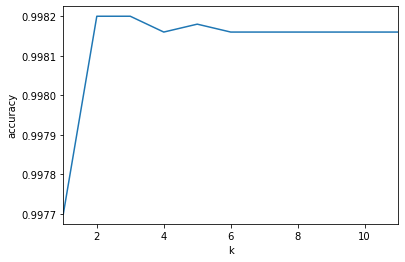

In [17]:
import matplotlib.pyplot as plt
y2=d2
x2=[1,2,3,4,5,6,7,8,9,10,11]
plt.xlim(1,11)
plt.plot(x2,y2) 
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

In [18]:
#MLP
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
import sklearn.metrics as metric
import numpy as np

In [19]:
mlp=MLPClassifier(random_state=1,activation='logistic').fit(X_train,y_train)
x1=mlp.predict(X_test)
print("Prediction using MLP:",x1)
x2=mlp.predict_proba(X_test)
print("Prediction probablity:",x2)
x3=mlp.score(X_test,y_test)
print("mean accuracy:",x3)

Prediction using MLP: [0. 0. 0. ... 0. 0. 0.]
Prediction probablity: [[0.99807332 0.00192668]
 [0.99807332 0.00192668]
 [0.99807332 0.00192668]
 ...
 [0.99807332 0.00192668]
 [0.99807332 0.00192668]
 [0.99807332 0.00192668]]
mean accuracy: 0.9981000316661389


In [9]:
#SVM
import numpy as np
from sklearn import svm
clf=svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [21]:
clf.support_vectors_

array([[ 4.47480000e+04,  1.29543869e+00,  9.39980906e-02, ...,
        -4.26943673e-02,  9.51186714e-03,  9.90000000e-01],
       [ 1.02837000e+05,  2.16514378e+00,  8.42394794e-01, ...,
        -1.04949336e-01, -2.53299367e-02,  7.60000000e-01],
       [ 8.58340000e+04, -1.64410701e+00, -1.86299272e+00, ...,
         4.49012790e-02,  7.26367576e-02,  1.00000000e-02],
       ...,
       [ 9.38530000e+04, -5.83919162e+00,  7.15153235e+00, ...,
         1.04886020e-01,  2.54417097e-01,  3.16060000e+02],
       [ 4.18510000e+04, -1.91397329e+01,  9.28684736e+00, ...,
        -3.38184293e+00, -1.25652362e+00,  1.39900000e+02],
       [ 6.44430000e+04,  1.07952398e+00,  8.72988039e-01, ...,
         1.89358320e-02,  6.05741495e-02,  0.00000000e+00]])

In [22]:
 print("accuracy of SVM with test set:",clf.score(X_test, y_test))

accuracy of SVM with test set: 0.9981000316661389


In [23]:
clf.fit(X_test,y_test)
r=clf.predict(X_test)
print(r)


[0. 0. 0. ... 0. 0. 0.]


In [24]:
clf=svm.SVC(kernel='sigmoid')
clf.fit(X_train,y_train)

print(clf.predict(X_test))

   
print("accuracy of SVM with test set(sigmoid kernel function):",clf.score(X_test, y_test))

[0. 0. 0. ... 0. 0. 0.]
accuracy of SVM with test set(sigmoid kernel function): 0.9981000316661389


In [12]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
m=DecisionTreeClassifier()
m = m.fit(X_train,y_train)
print("Training set accuracy:",m.score(X_train,y_train))
print("Test set accuracy:",m.score(X_test,y_test))
print(m.get_depth())


Training set accuracy: 1.0
Test set accuracy: 0.9990500158330694
21


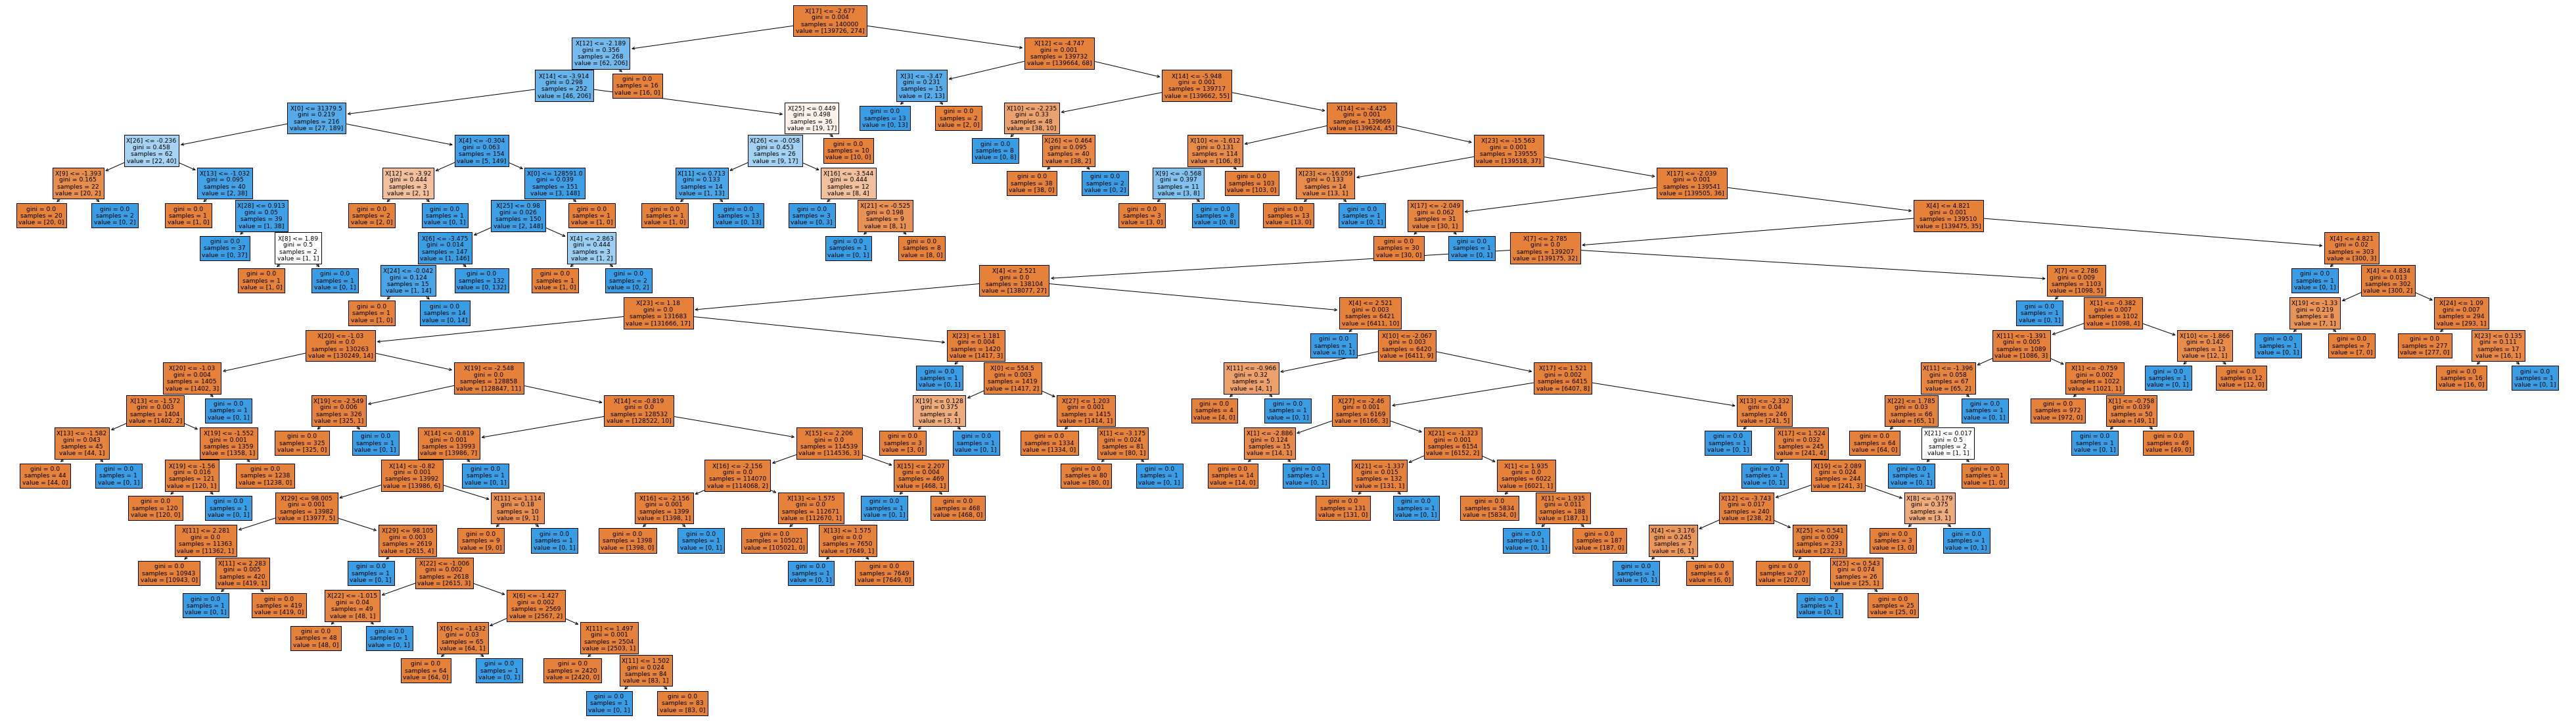

In [14]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(70,20))
tree.plot_tree(m, filled=True)
plt.show()


In [16]:
predicted=m.predict(X_test)
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,predicted)*100
print("accuracy is:",accuracy)

accuracy is: 99.90500158330694


In [17]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

[0. 0. 0. ... 0. 0. 0.]
Accuracy: 98.96668388860186
